
# 使用 SVM 預測 Titanic 乘客的存活機率

王昭元

## 讀入資料

我們使用 pandas 套件的 read_csv() 方法讀入資料集

In [2]:
import pandas as pd

# 讀入資料
url = "https://storage.googleapis.com/py_ds_basic/kaggle_titanic_train.csv"
titanic_train = pd.read_csv(url)

# 看看資料
titanic_train.head() # 發現 Cabin 有 NaN

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# 描述性統計
titanic_train.describe() # 發現 Age 有 NaN

C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 填補年齡的遺漏值
我們使用 平均值來填補 Age 變數的遺漏值。

In [41]:
import numpy as np
import matplotlib.pyplot as plt
titanic_train['Age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.560236    0.523008   
std     257.353842    0.486592    0.836071   13.005010    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   29.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


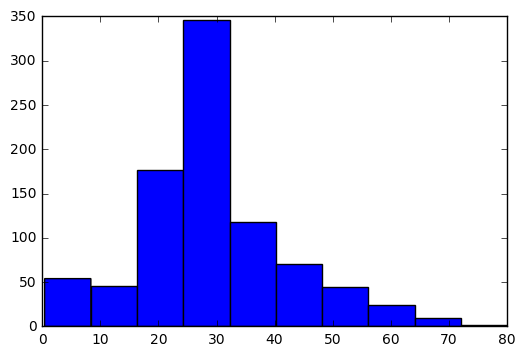

In [127]:
mean_age = int(np.mean(titanic_train['Age']))
new_Age = np.where(titanic_train["Age"].isnull(), mean_age, titanic_train["Age"])
titanic_train["Age"] = new_Age
print(titanic_train.describe())
plt.hist(titanic_train["Age"])
plt.show()

In [18]:
titanic_train.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.560236,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.005010,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 建立 dummy variables
SVM 必須要將類別變數轉換成 dummy variables。

In [124]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
encoded_Sex = label_encoder.fit_transform(titanic_train["Sex"])
encoded_Pclass = label_encoder.fit_transform(titanic_train["Pclass"])
encoded_Parch = label_encoder.fit_transform(titanic_train["Parch"])
#encoded_Fare= label_encoder.fit_transform(titanic_train["Fare"])
Fare= titanic_train["Fare"]

## 建立 X 與 y
Scikit-learn 完全使用矩陣運算。

In [135]:
titanic_X = pd.DataFrame([encoded_Pclass,
                          encoded_Sex,
                          new_Age,                         
                        ]).T

titanic_y = titanic_train["Survived"]

## 切分訓練與測試資料
利用 70%/30% 這個比例切分訓練與測試資料。

In [136]:
from sklearn.cross_validation import train_test_split

# 切分訓練與測試資料
train_X, test_X, train_y, test_y = train_test_split(titanic_X, titanic_y, test_size = 0.3)

## 建立 SVM 模型
我們使用 Sex，Pclass 與 Age  Parch Fare 來預測 Survived。

##  from sklearn.decomposition import RandomizedPCA


In [ ]:
from sklearn.svm import SVC
X = train_X
y = train_y
print(SVC().fit(X, y).score(X, y)) # print 1.0

In [ ]:
svc = SVC(kernel='rbf',C=10, gamma=0.1).fit(X, train_y)
train_score = svc.score(X, train_y) 
print(train_score) # 1.0 still !!

X_test = test_X
y_test =test_y
test_score = svc.score(X_test, y_test)
print(test_score) # 0.325 crap....

## 應用模型在沒有答案的資料

In [163]:
url = "https://storage.googleapis.com/py_ds_basic/kaggle_titanic_test.csv"
to_submit = pd.read_csv(url)
# 跟訓練資料作一樣的整理
#rint(to_submit.describe())
encoded_Sex_to_submit = label_encoder.fit_transform(to_submit["Sex"])
encoded_Pclass_to_submit = label_encoder.fit_transform(to_submit["Pclass"])
int(np.mean(to_submit["Age"]))
age_mean = int(np.mean(to_submit["Age"])) # 要忽略 NaN)
imputed_Age = np.where(to_submit["Age"].isnull(), age_mean, to_submit["Age"])
#imputed_Age = np.where(to_submit["Age"].isnull(), age_median, to_submit["Age"])

to_submit_X = pd.DataFrame([encoded_Sex_to_submit,
                            encoded_Pclass_to_submit,
                            imputed_Age
]).T

In [ ]:
to_submit_y = svc.predict(to_submit_X)
print(to_submit_y)
# 準備要上傳的檔案
to_submit_dict = {
    "PassengerId": to_submit["PassengerId"],
    "Survived": to_submit_y
}
to_submit_df = pd.DataFrame(to_submit_dict)

# 輸出成 csv
to_submit_df.to_csv("to_submit.csv", index = False)